# 2.3.8 신경망 (딥러닝)

## 신경망 모델

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
import matplotlib
import mglearn
import os


from preamble import *

from sklearn.model_selection import train_test_split


from matplotlib.pyplot import rc
rc('font',family='New Gulim') #plot 한글폰트 적용

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

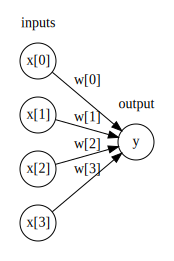

In [3]:
mglearn.plots.plot_logistic_regression_graph()

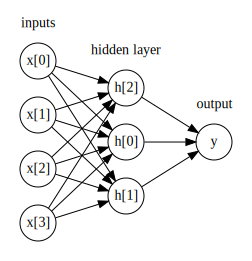

In [4]:
mglearn.plots.plot_single_hidden_layer_graph()

Text(0,0.5,'relu(x), tanh(x)')

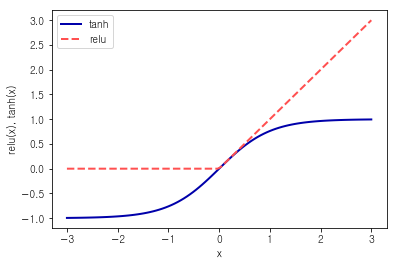

In [5]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

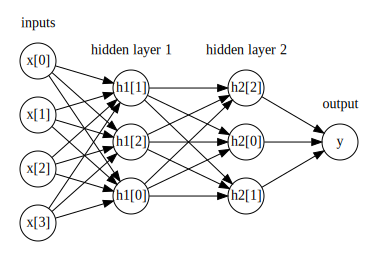

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

hidden layer 의 정의?
- 참고자료 : 
    - Backward Propagation : https://www.dropbox.com/s/6za0jzv8u0thzfa/04.Back_propagation.new.pdf?dl=0
    - Multi-layer Neural Networks https://www.dropbox.com/s/q7054ztkuo29vrn/05.Deep_leaning.pdf?dl=0
![](./hidden_layer_1.JPG)
![](./hidden_layer_2.JPG)

## 신경망 튜닝

- MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=(100, ), activation='tanh')
    - hidden_layer_sizes 매개변수가 없을 때 기본적인 신경망 구조, 튜플형태
        - 기본: hidden layer 1개
        - 기본: hidden unit 개수: 100개
        - hidden_layer_sizes=(10, 10)
            - hidden layer 2개
            - hidden layer unit 수 - 각 층마다 10개씩
    - activation
        - 기본값: relu
        - tanh
    - solver (=optimizer)
        - 기본값: adam
            - 데이터의 스케일에 민감 --> 정규화 (평균 0, 분산 1) 중요
        - lbfgs
            - an optimizer in the family of quasi-Newton methods
            - 대부분의 경우 안정적
            - 대량의 데이터에 대한 많은 연산 필요
        - sgd
            - momentum 및 nesterov_momentum 매개변수 지정 필요
            - momentum
            - 새롭게 계산된 그레디언트에 대해 momentum 매개변수에 지정된 비율만큼만 반영 --> 관성 적용
            - nesterov_momentum
                - momentum 방식으로 구한 그레디언트를 이전 그레디언트로 가정
                - 한번 더 momentum 방식을 적용하여 새로운 그레디언트 계산
    - batch_size : int, optional, default ‘auto’
        - Size of minibatches for stochastic optimizers.
        - If the solver is ‘lbfgs’, the classifier will not use minibatch.
        - When set to “auto”, batch_size=min(200, n_samples)

Text(0,0.5,'특성 1')

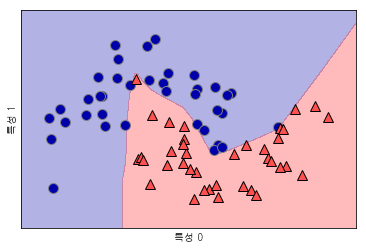

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

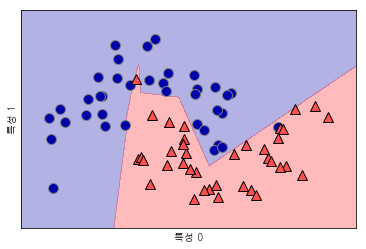

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

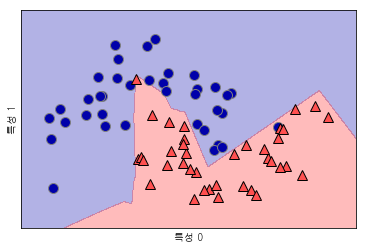

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0,0.5,'특성 1')

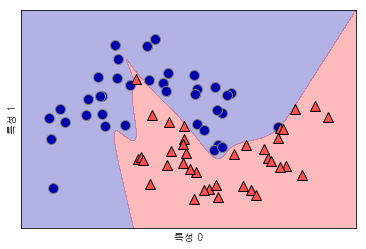

In [10]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

- L2 규제 사용
    - alpha 매개변수 사용 : 기본값: 0.00001
    
- 규제가 낮다 -> 복잡도가 높다. , 오버피팅에 주의

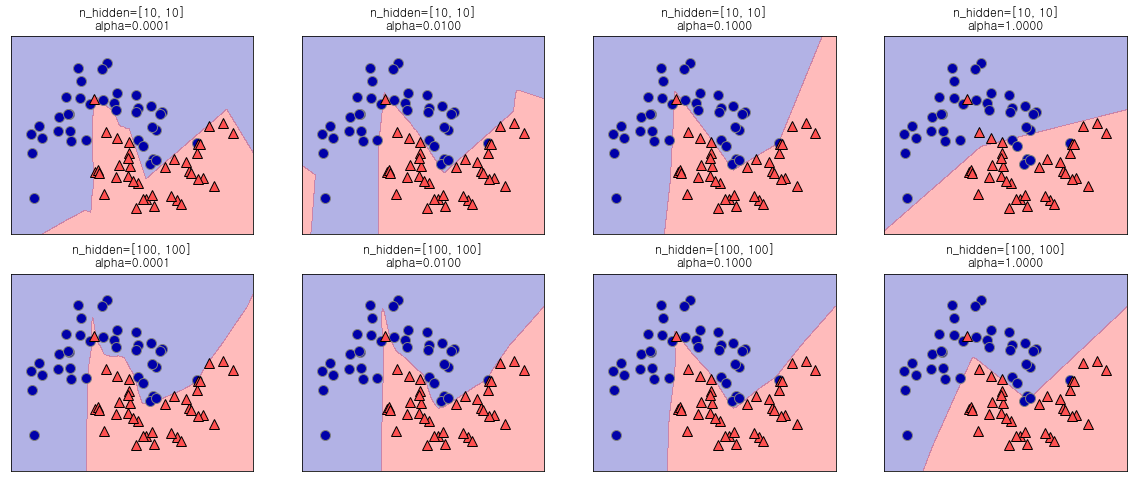

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

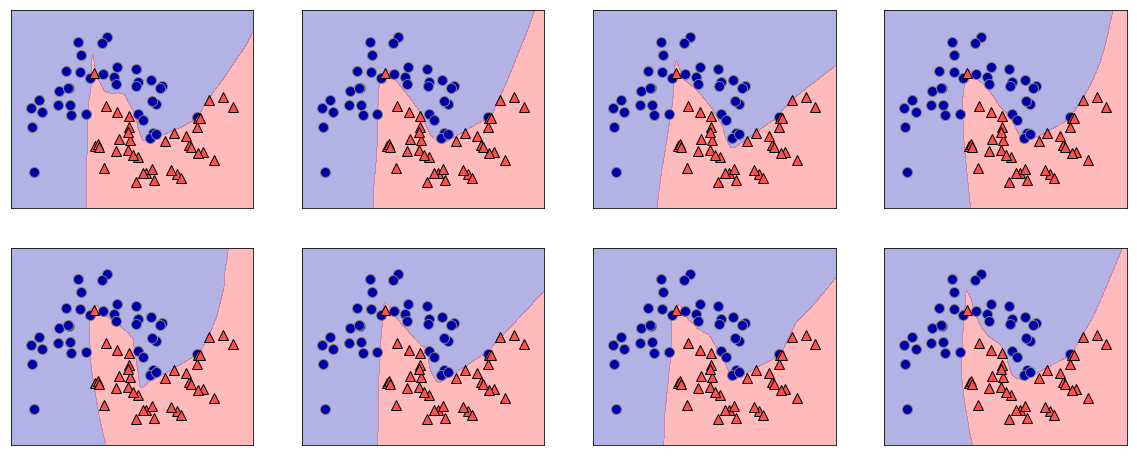

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [13]:
print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.91
테스트 세트 정확도: 0.88


### 데이터 정규화

In [15]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- Warning Msg : adam optimizer에서 200번 정도의 iteration으로는 converge 시키기 부족함 --> max_iter 값 증가 필요

In [16]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.993
테스트 세트 정확도: 0.972


In [17]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
훈련 세트 정확도: 0.972


In [18]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1)

(array([0.03 , 0.047, 0.042, 0.037, 0.024, 0.028, 0.042, 0.048, 0.028,
        0.024, 0.061, 0.02 , 0.046, 0.039, 0.02 , 0.037, 0.019, 0.022,
        0.02 , 0.036, 0.055, 0.057, 0.048, 0.048, 0.038, 0.024, 0.046,
        0.053, 0.041, 0.03 ]),
 array([0.001, 0.002, 0.002, 0.001, 0.001, 0.001, 0.002, 0.002, 0.001,
        0.001, 0.004, 0.   , 0.002, 0.002, 0.   , 0.001, 0.   , 0.001,
        0.   , 0.001, 0.003, 0.003, 0.002, 0.002, 0.001, 0.001, 0.002,
        0.003, 0.002, 0.001]))

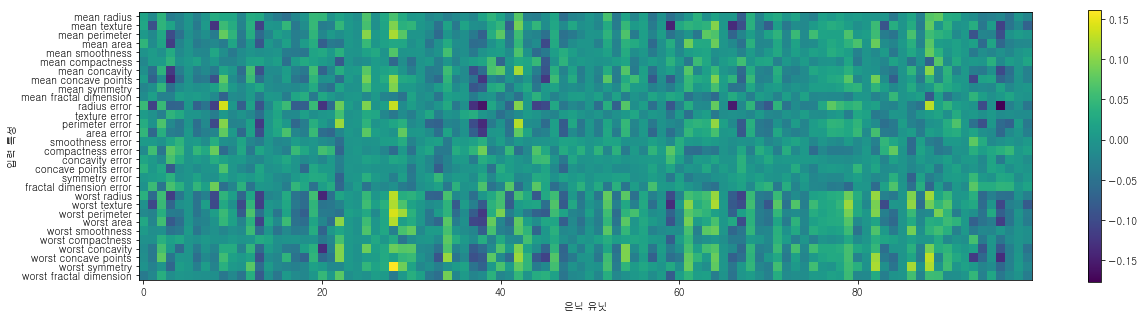

In [19]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

## 장단점과 매개변수

- 장점
    - 대량의 데이터에 대한 매우 복잡한 모델 생성 가능
    - 매개변수를 세심하게 조정하면 머신러닝 알고리즘 능가
- 단점
    - 종종 학습에 오래 걸림
    - 

## 신경망의 복잡도 추정